Temperature and CO2 Levels:

Investigate the correlation between global temperatures and atmospheric CO2 concentrations over time. Historical temperature and CO2 data can be obtained from reliable sources such as NASA or NOAA.
Sea Level Rise and Global Temperature:

Examine the correlation between rising global temperatures and sea level rise. Melting ice caps and glaciers contribute to the rise in sea levels, so exploring this relationship is crucial.
Extreme Weather Events and Temperature:

Explore the correlation between global temperature changes and the frequency or intensity of extreme weather events such as hurricanes, droughts, floods, and wildfires.
Ocean Acidification and CO2 Levels:

Investigate the relationship between rising atmospheric CO2 levels and ocean acidification. Increased CO2 absorption by the oceans can lead to changes in ocean pH, affecting marine ecosystems.
Glacial Retreat and Temperature:

Explore how the retreat of glaciers and ice sheets correlates with global temperature increases. This can provide insights into the impact of temperature changes on polar regions.
Temperature and Biodiversity:

Study the correlation between changing temperatures and shifts in biodiversity and ecosystems. Climate change can influence the distribution and behavior of various species.
Renewable Energy Adoption and CO2 Emissions:

Analyze the correlation between the adoption of renewable energy sources (solar, wind, etc.) and reductions in CO2 emissions. This can provide insights into the effectiveness of green energy initiatives.
Land Use Changes and Climate Change:

Explore how changes in land use patterns, such as deforestation or urbanization, correlate with climate change indicators. Land use changes can impact the Earth's surface energy balance.
Methane Emissions and Temperature:

Investigate the correlation between rising temperatures and methane emissions. Methane is a potent greenhouse gas, and its release can be influenced by temperature changes.
Human Activities and Emissions:

Explore the correlation between human activities (industrialization, deforestation, etc.) and the increase in greenhouse gas emissions. Understanding human contributions to climate change is crucial for mitigation strategies.

imp links:
- https://www.kaggle.com/pushpendra3000/climchan-1/edit
- https://www.kaggle.com/pushpendra3000/climchan2/edit
- https://www.kaggle.com/pushpendra3000/climchan3/edit
- https://www.kaggle.com/pushpendra3000/climchan4/edit
- https://raf888-sr-streamlit-apps-co2-emissions-streamlit-86zw61.streamlit.app/

In [1]:
#Library and data importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_country = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")
data_india = data_country[data_country["Country"] == "India"].copy()
data_india["dt"] = pd.to_datetime(data_india["dt"])

data_global = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
data_global["dt"] = pd.to_datetime(data_global["dt"])
co2_ppm = pd.read_csv("../input/carbon-dioxide/archive.csv")

In [2]:
annual_mean_global = data_global.groupby(data_global["dt"].dt.year).mean()
reference_temperature_global = annual_mean_global.loc[1951:1980].mean()["LandAndOceanAverageTemperature"]
annual_mean_global["Anomaly"] = annual_mean_global["LandAndOceanAverageTemperature"] - reference_temperature_global

In [3]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613 entries, 243695 to 246307
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2613 non-null   datetime64[ns]
 1   AverageTemperature             2508 non-null   float64       
 2   AverageTemperatureUncertainty  2508 non-null   float64       
 3   Country                        2613 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 102.1+ KB


In [4]:
# annual_mean_india = data_india.groupby(data_india["dt"].dt.year).mean()
# reference_temperature_india = annual_mean_india.loc[1951:1980].mean()["AverageTemperature"]
# annual_mean_india["Anomaly"] = annual_mean_india["AverageTemperature"] - reference_temperature_india

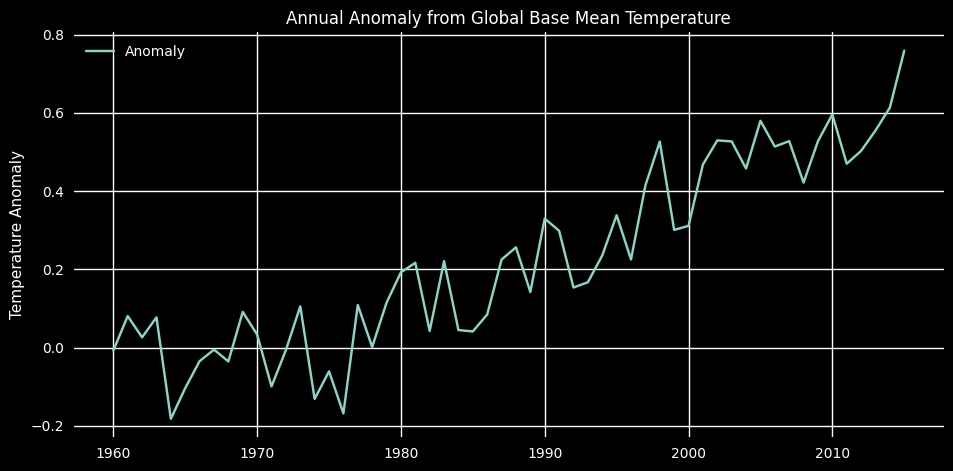

In [87]:
plt.figure()
plt.style.use("dark_background")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Annual Anomaly from Global Base Mean Temperature", color="white")
plt.xlabel('',color="black")
plt.ylabel('Temperature Anomaly',color="white")
plt.savefig("annual_anomaly_global_base.png", format='png')
plt.show()

In [6]:
# plt.figure()
# plt.style.use("fivethirtyeight")
# annual_mean_greece.loc[1960:2012]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
# plt.title("Annual anomaly from base mean temperature (India)")
# plt.xlabel('')
# plt.ylabel('Temperature Anomaly')
# plt.show()

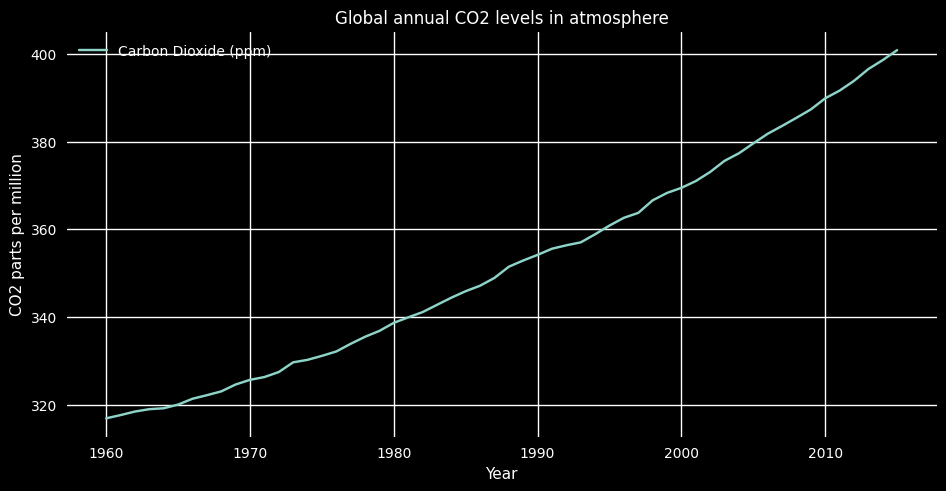

In [88]:
plt.figure()
plt.style.use("dark_background")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.savefig("global_annual_co2.png", format='png')
plt.show()

In [8]:
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index=True, right_index=True)
annual_co2_temp = annual_co2_temp[["LandAndOceanAverageTemperature", "Anomaly", "Carbon Dioxide (ppm)"]].copy()
annual_co2_temp.corr()

,LandAndOceanAverageTemperature,Anomaly,Carbon Dioxide (ppm)
LandAndOceanAverageTemperature,1.000000,1.000000,0.923603
Anomaly,1.000000,1.000000,0.923603
Carbon Dioxide (ppm),0.923603,0.923603,1.000000


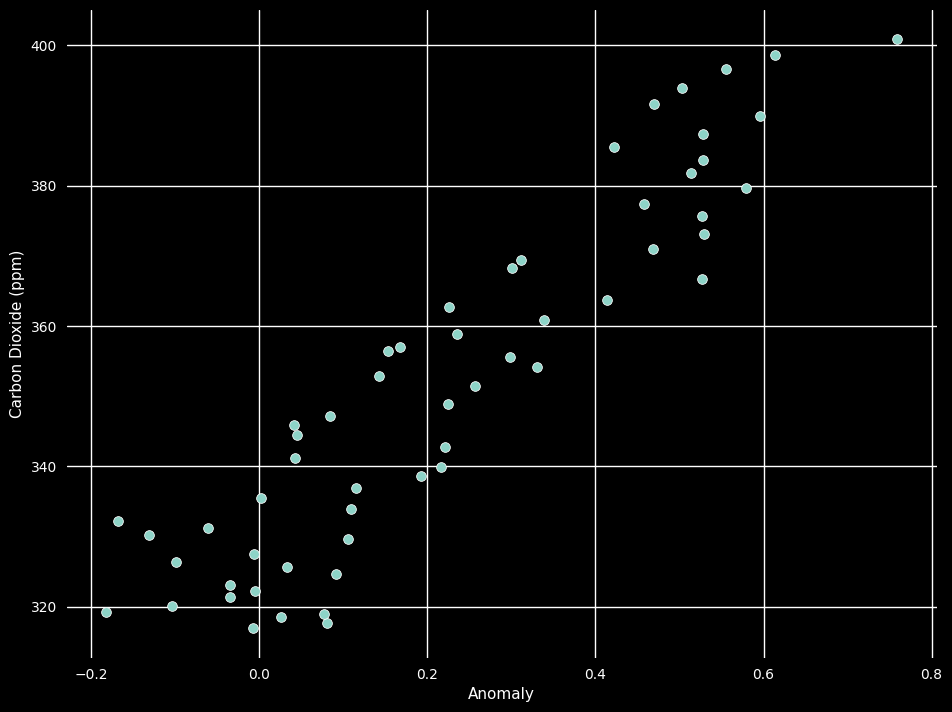

In [89]:
plt.figure(figsize=(10,8))
plt.style.use("dark_background")
sns.scatterplot(x="Anomaly",y="Carbon Dioxide (ppm)", data=annual_co2_temp)
plt.savefig("scatter_1.png", format='png')

In [10]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')
%matplotlib inline

/tmp/ipykernel_42/1491032077.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [11]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Choose the required columns
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]

# Set the date column as a DateTimeIndex and sort it
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

In [13]:
# Check the number of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761,
       1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
       1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785,
       1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
       1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849],
      dtype='int32', name='Year')


In [14]:
global_temp_df.dropna(inplace = True)

In [15]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


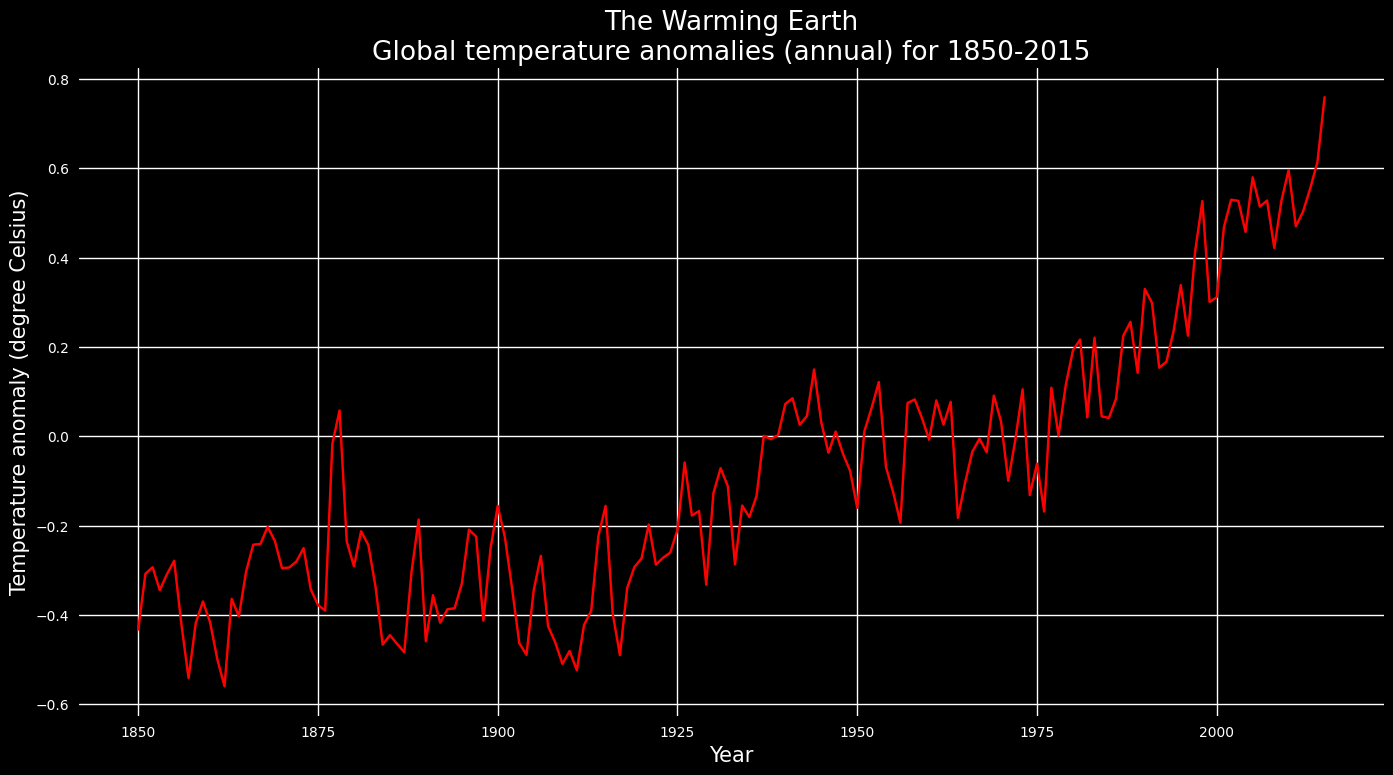

In [90]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))
plt.style.use("dark_background")
plt.grid(True)
plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)
plt.savefig("global_temp.png", format='png')
plt.show()

In [17]:
# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv('../input/natural-disaster-data/number-of-natural-disaster-events.csv')
nat_disaster_df = orig_disaster_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [18]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

# Check the different types of 'Entity' values
nat_disaster_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [19]:
# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
nat_disaster_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Remove the 'Impact' column
nat_disaster_df.drop(['Impact'], axis = 1, inplace = True)

# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')

nat_disaster_df.head()

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


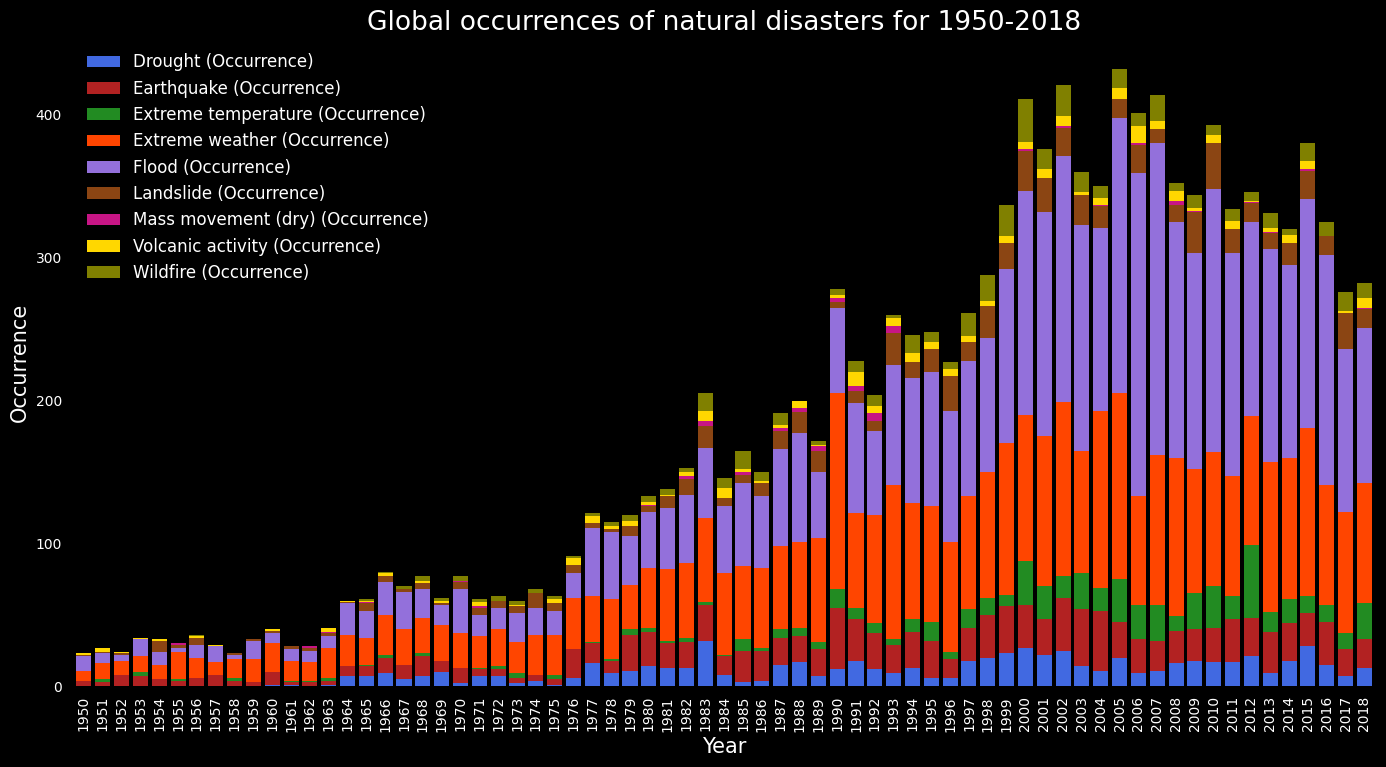

In [91]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

nat_disaster_df.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 19)
plt.style.use("dark_background")
plt.grid(False)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})
plt.savefig("natural_disast.png", format='png')
plt.show()

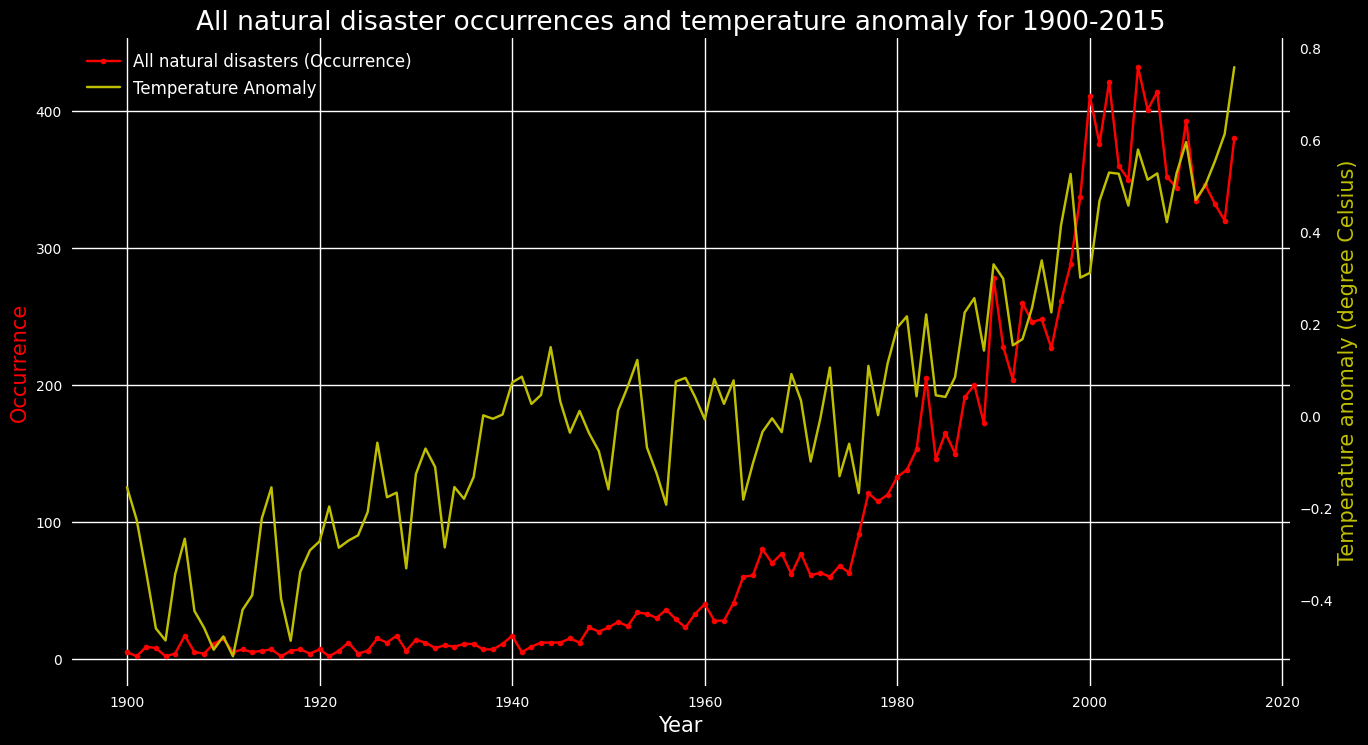

In [92]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temperature Anomaly'], 'y-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 19)
plt.style.use("dark_background")
plt.grid(False)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'y')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})
plt.savefig("natural_disast_2.png", format='png')
plt.show()

In [23]:
# Load the economic damage dataset and store it in a dataframe
orig_econ_data = pd.read_csv('../input/natural-disaster-data/economic-damage-from-natural-disasters.csv')
econ_dmg_df = orig_econ_data.copy()

econ_dmg_df.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [24]:
# Remove the 'Code' column
econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
econ_dmg_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
econ_dmg_df.drop(['Impact'], axis = 1, inplace = True)

econ_dmg_df.fillna(value = 0, inplace = True)
econ_dmg_df = econ_dmg_df.add_suffix(' (Economic Damage)')

econ_dmg_df.head()

Entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


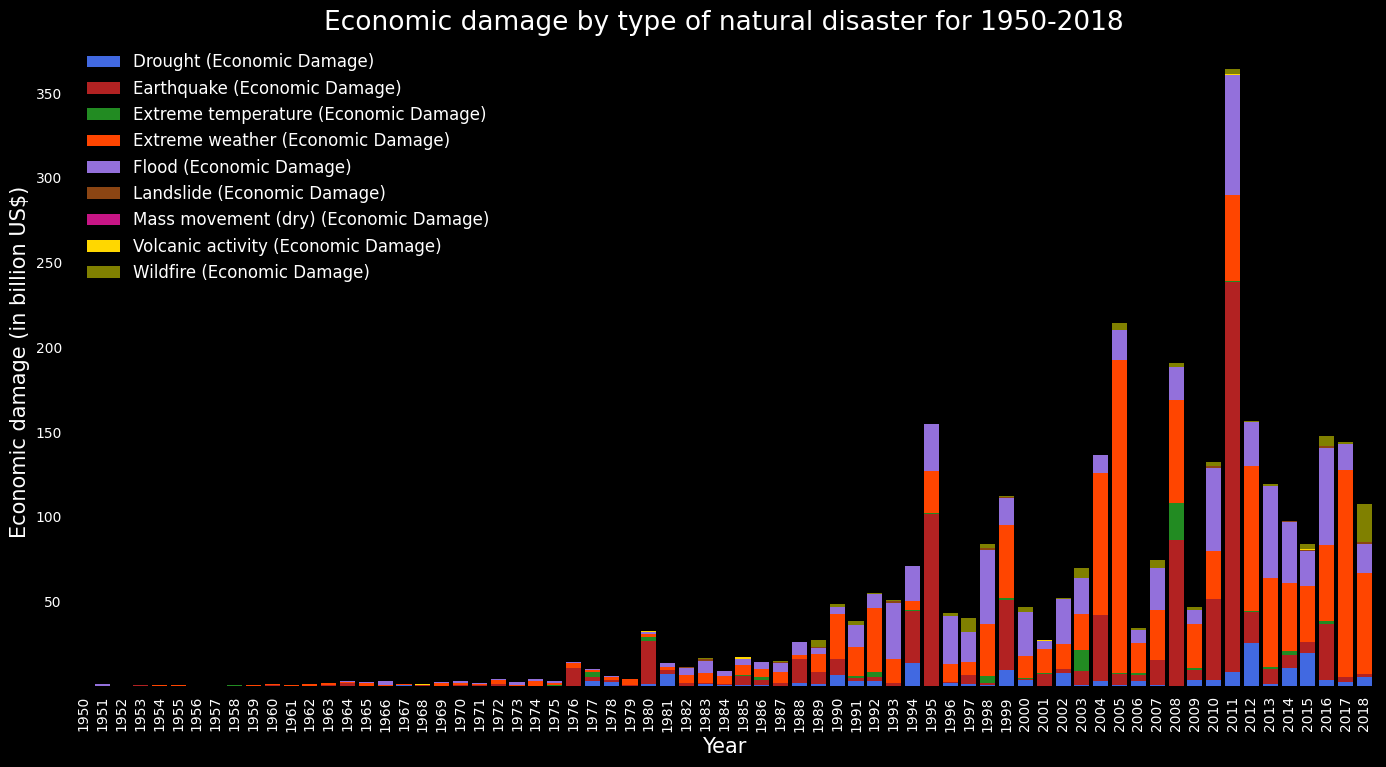

In [93]:
# Plot the economic damage categorised by the type of natural disasters for 1950-2018
((econ_dmg_df.drop(['All natural disasters (Economic Damage)'], axis = 1).loc[1950:]) / 1e9).plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize = 19)
plt.style.use("dark_background")
plt.grid(False)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Economic damage (in billion US$)', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})
plt.savefig("natural_disast_3.png", format='png')
plt.show()

In [27]:
combined_df = global_temp_df.join([nat_disaster_df, econ_dmg_df], how = 'inner')
combined_df.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
correlation_table = combined_df.corr()
correlation_table.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Temperature Anomaly,1.000000,0.865128,0.750086,0.796451,0.738191,0.848536,0.841740,0.772180,0.257074,0.669120,...,0.647406,0.515849,0.346882,0.294110,0.588786,0.678628,0.353444,0.010518,0.215112,0.557517
All natural disasters (Occurrence),0.865128,1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.894296,0.349152,0.788590,...,0.740809,0.550956,0.400397,0.335689,0.686369,0.759470,0.439097,-0.047811,0.203272,0.624099
Drought (Occurrence),0.750086,0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.790511,0.398695,0.710884,...,0.578329,0.583563,0.293073,0.255171,0.525367,0.600423,0.518547,-0.068802,0.251909,0.515664
Earthquake (Occurrence),0.796451,0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.778272,0.408753,0.708440,...,0.667560,0.509985,0.394882,0.321490,0.588992,0.663298,0.416438,-0.063196,0.263032,0.538465
Extreme temperature (Occurrence),0.738191,0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.751340,0.165342,0.556775,...,0.680193,0.596794,0.316083,0.229073,0.704082,0.657396,0.296600,-0.033887,0.097393,0.569856


In [29]:
# Correlation with respect to temperature anomaly
combined_df.corr()['Temperature Anomaly']

Temperature Anomaly                        1.000000
All natural disasters (Occurrence)         0.865128
Drought (Occurrence)                       0.750086
Earthquake (Occurrence)                    0.796451
Extreme temperature (Occurrence)           0.738191
Extreme weather (Occurrence)               0.848536
Flood (Occurrence)                         0.841740
Landslide (Occurrence)                     0.772180
Mass movement (dry) (Occurrence)           0.257074
Volcanic activity (Occurrence)             0.669120
Wildfire (Occurrence)                      0.683839
All natural disasters (Economic Damage)    0.647406
Drought (Economic Damage)                  0.515849
Earthquake (Economic Damage)               0.346882
Extreme temperature (Economic Damage)      0.294110
Extreme weather (Economic Damage)          0.588786
Flood (Economic Damage)                    0.678628
Landslide (Economic Damage)                0.353444
Mass movement (dry) (Economic Damage)      0.010518
Volcanic act

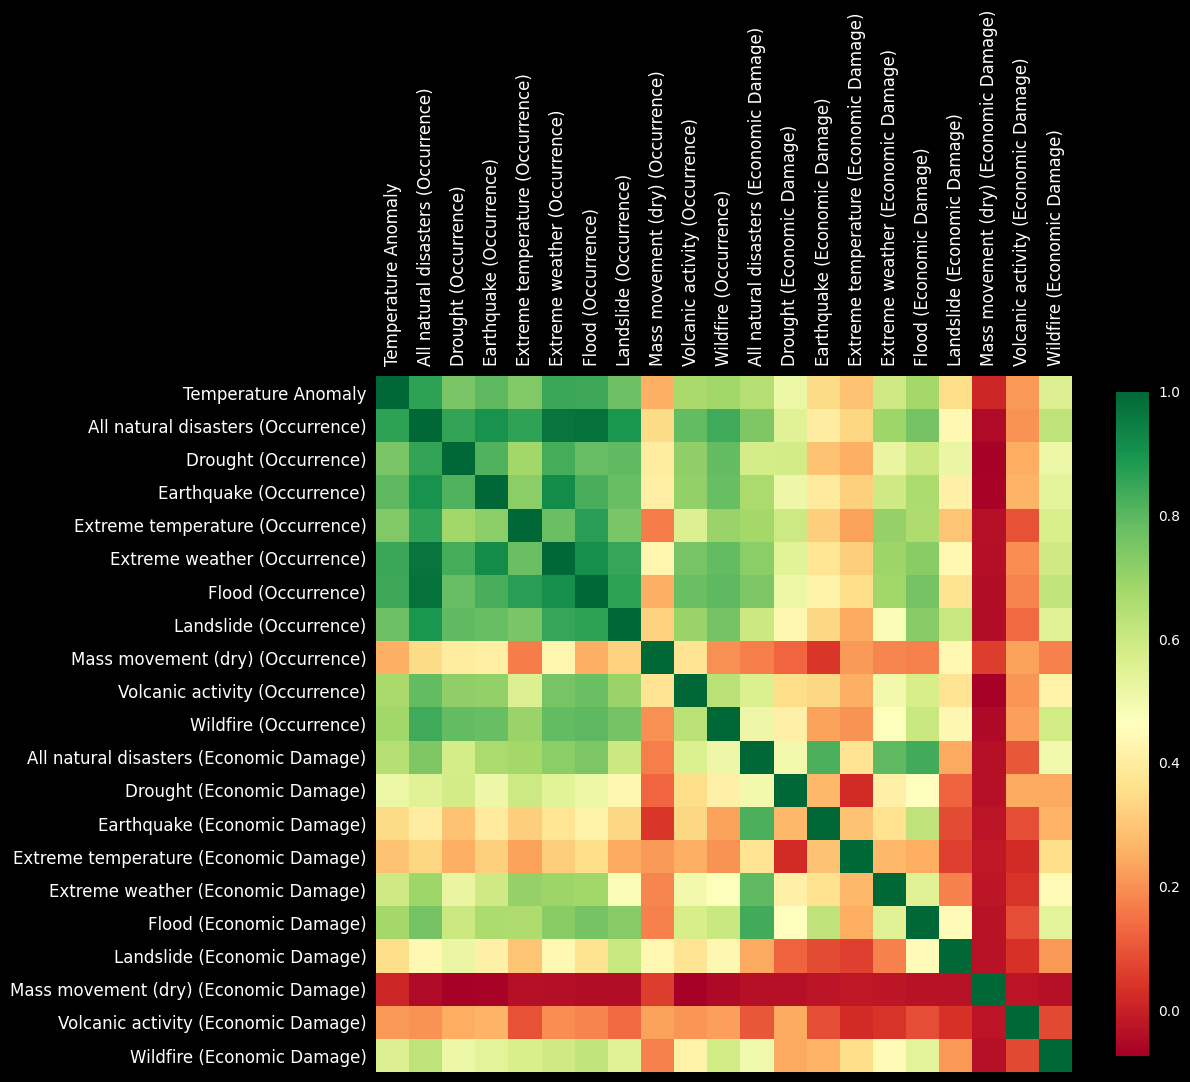

In [94]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)
plt.style.use("dark_background")
plt.grid(False)
plt.savefig("correlation.png", format='png')
plt.show()

In [100]:
#Library Imports

import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio

import json

import warnings
warnings.filterwarnings('ignore')


In [32]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [33]:
# Original Data
data= pd.read_csv("../input/temperature-change-in-indian-states-19022020/Mean Temperature Data.csv")

In [34]:
# Function for zonal-classification of states
def zones(state):
    if state in ['Chandigarh','Delhi','Haryana','Himachal Pradesh','Punjab','Rajasthan']: return 'North'
    elif state in ['Bihar', 'Orissa', 'Jharkhand', 'West Bengal']: return 'East'
    elif state in ['Dadra and Nagar Haveli','Daman and Diu','Goa','Gujarat','Maharashtra']: return 'West'
    elif state in ['Andhra Pradesh','Karnataka','Kerala','Puducherry','Tamil Nadu','Andaman and Nicobar','Lakshadweep']: return 'South'
    elif state in ['Chhattisgarh','Madhya Pradesh','Uttarakhand','Uttar Pradesh']: return 'Central'
    elif state in ['Assam','Sikkim','Nagaland','Meghalaya','Manipur','Mizoram','Tripura','Arunachal Pradesh']: return 'North East'
    else: return None

In [35]:
#creating a copy of data
df=data.copy()

#Calculate basline mean relative to the period 1961-1990
df['Baseline mean']= df.iloc[:,62:92].mean(axis=1).round(2)

#Temp. Change relative to the baseline mean

df= df.melt(id_vars= ['States', 'Period', 'Baseline mean'], var_name= 'Year', value_name= 'temp_change')
df['Year']= df['Year'].astype(int)
df['Zone']= df['States'].apply(zones)
df['temp_change']= df['temp_change']-df['Baseline mean']
df= df[['States', 'Zone', 'Period', 'Year', 'temp_change', 'Baseline mean']]

In [106]:
# Which ten states/UTs suffered the most from temperature change in the last ten years?

df_c= df[ (df.Period=='Annual') & (df.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nlargest(10, 'temp_change')
df_c.reset_index(inplace=True)

fig= px.bar(df_c, x='States', y='temp_change', text_auto='.2f', 
            title= 'Ten States/UTs which suffered the most from temperature change in the last ten years (2011-2020)',
            color='temp_change',
            color_continuous_scale= 'teal'
           )

fig.update_layout(
    width=1000,
    height=600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5
    
)
fig.update_traces(textposition='outside')
fig.update_xaxes( title='States/UTs')
fig.update_yaxes( title='Temperature Change (°C)')
fig.write_html("output.html")
fig

In [37]:
# Which ten states/UTs suffered the least from temperature change in the last ten years?

df_c= df[ (df.Period=='Annual') & (df.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nsmallest(10, 'temp_change')
df_c.reset_index(inplace=True)

fig= px.bar(df_c, x='States', y='temp_change', text_auto='.2f', 
            title= 'Ten States/UTs which suffered the least from temperature change in the last ten years (2011-2020)',
            color='temp_change',
            color_continuous_scale= 'teal'
           )

fig.update_layout(
    width=1000,
    height= 600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5

)
fig.update_traces(textposition='outside')
fig.update_yaxes( title='Temperature Change (°C)')

fig

In [38]:
# # Zone-wise temperature change in the last decade (2011-2020)

# fig= px.bar(df[ (df.Year>2010) & (df.Period=='Annual')].groupby('Zone').mean().round(2).sort_values('temp_change',ascending=False),
#             text='temp_change',
#             y='temp_change',
#             title= 'Zone-wise temperature change in the last ten years (2011-2020)',
#             color='temp_change',
#             color_continuous_scale= 'teal'
#            )

# fig.update_layout(
#     width=1000,
#     height= 600,
#     template='plotly_dark',
#     coloraxis_showscale=False,
#     title_x= 0.5

# )
# fig.update_traces(textposition='outside')
# fig.update_yaxes( title='Temperature Change (°C)')

# fig

In [39]:
# Temperature change trend in India
fig= px.bar(df[(df.States=='India') & (df.Period=='Annual')],
            x= 'Year',
            y='temp_change',
            title= 'Temperature change in India (1901-2020)',
            color='temp_change',
            color_continuous_scale= 'ice_r',
            range_color=[-1,1.7]
           )

fig.update_layout(
    width=1000,
    height= 600,
    template='plotly_dark',
    coloraxis_showscale=False,
    title_x= 0.5
)

fig.update_xaxes( tickmode='linear',tick0=1901, dtick=10)
fig.update_yaxes( title='Temperature Change (°C)')

fig

In [114]:
import plotly.graph_objects as go

# ... (your data processing code)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.Year, y=df1.temp_change,
                    mode='lines',
                    name='Winter'))
fig.add_trace(go.Scatter(x=df2.Year, y=df2.temp_change,
                    mode='markers',
                    name='Summer'))
fig.add_trace(go.Scatter(x=df3.Year, y=df3.temp_change,
                    mode='lines', 
                    name='Monsoon'))
fig.add_trace(go.Scatter(x=df4.Year, y=df4.temp_change,
                    mode='markers', 
                    name='Post Monsoon'))

fig.add_annotation(
    x=48,
    y=1.97,
    xref="x",
    yref="y",
    text="Hottest Winter (2009, 1.97)",
    xanchor='right',
    showarrow=True,
    font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-20,
    ay=10,
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ff7f0e",
    opacity=1
)

fig.add_annotation(
    x=49,
    y=1.96,
    xref="x",
    yref="y",
    text="Hottest Summer (2010, 1.96)",
    xanchor='center',
    showarrow=True,
    font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-15,
    ay=-30,
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ff7f0e",
    opacity=1
)

fig.update_layout(
    width=1000,
    height=600,
    template='plotly_dark',  # Use 'plotly_dark' template for a dark background
    title='Season-wise temperature change in India (1961-2020)',
    title_x=0.5,
    title_y=0.95,
    
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ) 
)

fig.update_xaxes(type='category', title='Years')
fig.update_yaxes(title='Temperature Change (°C)')

fig.show()


In [41]:
# # The code below is used to design Climate Spiral and it takes aroung 5-6 minutes to execute.

# #=========================================== Code Start ===========================================

# from matplotlib.animation import FuncAnimation, writers

# months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# df_c= df[(df.States=='India') & (df.Period.isin(months)) ][['Period','Year','temp_change']]
# df_c.reset_index(drop=True,inplace=True)

# fig=plt.figure(figsize=(8,8))
# ax=plt.subplot(111,projection="polar")

# ax.plot(np.linspace(0, 2*np.pi, 1000), [2.5]*1000, c='white', linewidth=4)
# ax.plot(np.linspace(0, 2*np.pi, 1000), [4]*1000, c='white', linewidth=4)
# ax.plot(np.linspace(0, 2*np.pi, 1000), [4.5]*1000, c='white', linewidth=4)


# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_ylim(0,5.5)
# fig.set_facecolor("#2f3543")
# ax.set_facecolor("#1c1f2e")


# ax.text(3*np.pi/2, 4.1, "1.5° C", color="white", ha='center', fontsize= 12,bbox=dict(facecolor='#1c1f2e', edgecolor='#1c1f2e'))
# ax.text(3*np.pi/2, 4.6, "2.0° C", color="white", ha='center', fontsize= 12,bbox=dict(facecolor='#1c1f2e', edgecolor='#1c1f2e'))

# theta = np.linspace(0, 2*np.pi, 13)

# fig.text(0.08,0.96,"India's Temperature Change (1901-2020) ",color="white",fontsize=25)
# # fig.text(0.05,0.04,"Based on Ed Hawkins's 2017 Visualization",color="white",fontsize=10)
# fig.text(0.7,0.04,"Baseline: 1961-1990",color="white",fontsize=15)


# #add months ring
# months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
# for i,month in enumerate(months):
#     ax.text(theta[i],6,month,color="white",fontsize=15,ha="center")

# years= df_c.Year.unique()

# def update(i):
#     if i<df_c.index[-1]:
        
#         for txt in ax.texts:
#             if(txt.get_position()==(0,0)):
#                 txt.set_visible(False)
            
#         r = df_c.temp_change[i:i+2] +2.5
#         ax.plot(theta[ [i%12,(i+1)%12] ], r, c=plt.cm.summer_r(i//6), linewidth=2)
        
#         year= years[i//12]
#         ax.text(0,0,year,fontsize=20,color="white",ha="center") 
#     else:
#         ax.plot( theta[df_c.index[-1]%12], df_c.loc[len(df_c)-1].temp_change +2.5,color='orange', marker='o', markersize=8)
#     return ax


# anim = FuncAnimation(fig, update, frames=df_c.index , interval=1)



# #Saving the animation (.gif) 
# anim.save('climate_spiral.gif', writer='pillow', fps=50)


# #Saving the animation (.mp4) 
# Writer= writers['ffmpeg']
# writer= Writer(fps=96, metadata={'artist':'Me'}, bitrate=-1)
# anim.save('climate_spiral.mp4',writer, dpi=250)

# #=========================================== Code End ===========================================

# # from ipywidgets import Video
# # Video.from_file("../input/climate-change-in-india-support-data/climate_spiral.mp4", width=400, height=400 )

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('../input/daily-temperature-of-major-cities/city_temperature.csv')
data_india = data[data['Country'] == 'India']
data_india = data_india[data_india['Year'] <2020]

In [43]:
data_india = data[data['Country'] == 'India']
data_india = data_india[data_india['Year'] <2020]

In [44]:
def to_celsius(F):
    return round(5/9*(F - 32),1)

data_india['AvgTemperature'] = data_india['AvgTemperature'].apply(to_celsius)

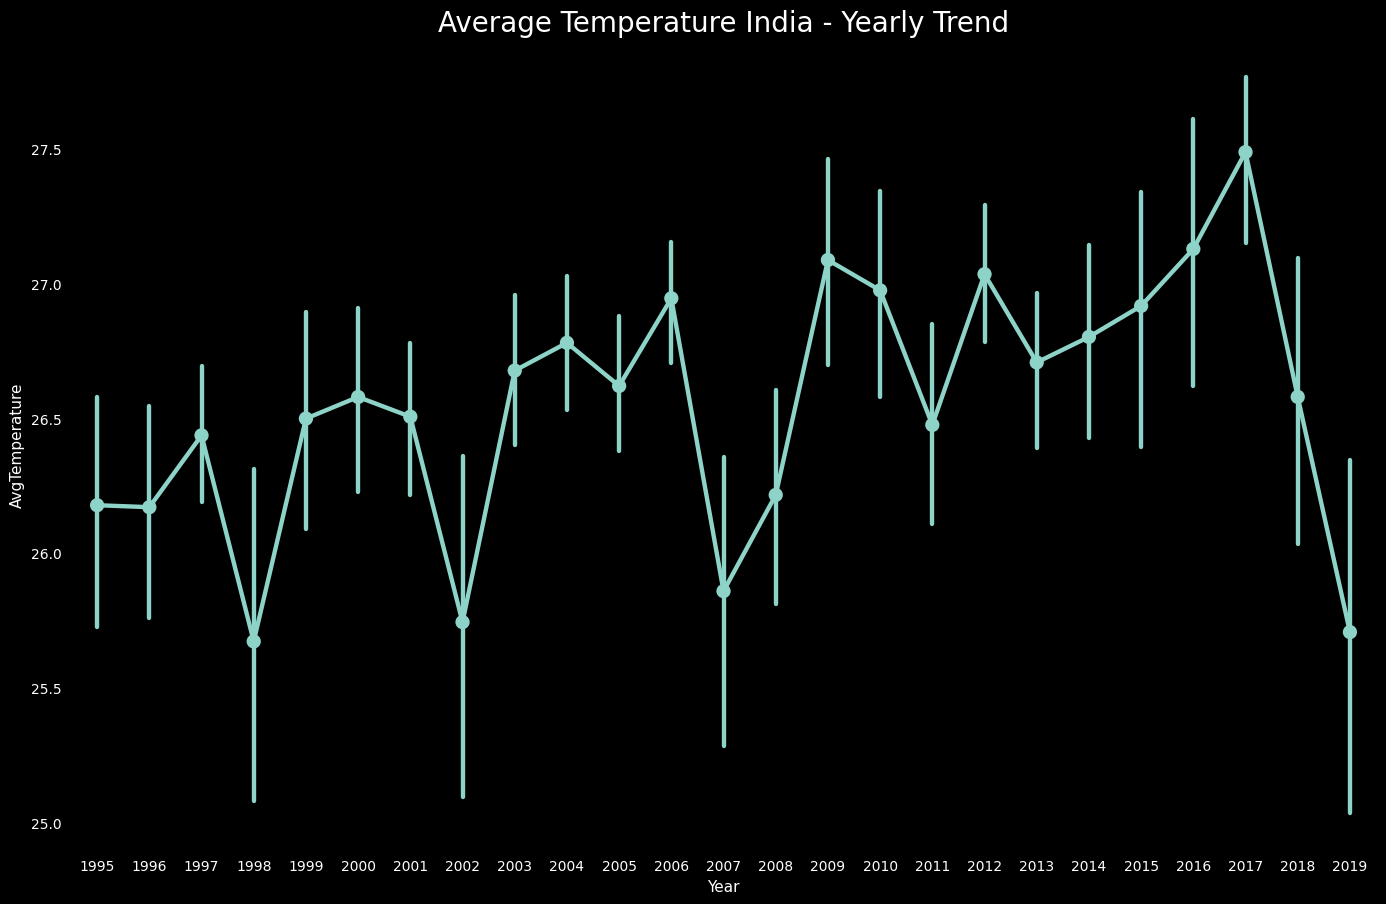

In [110]:
plt.figure(figsize= (15,10))
plt.style.use("dark_background")
plt.grid(False)
sns.pointplot(x='Year', y='AvgTemperature', data=data_india);
plt.title('Average Temperature India - Yearly Trend',fontsize=20);
plt.savefig("avg_tmp_india_yearly.png", format="png")

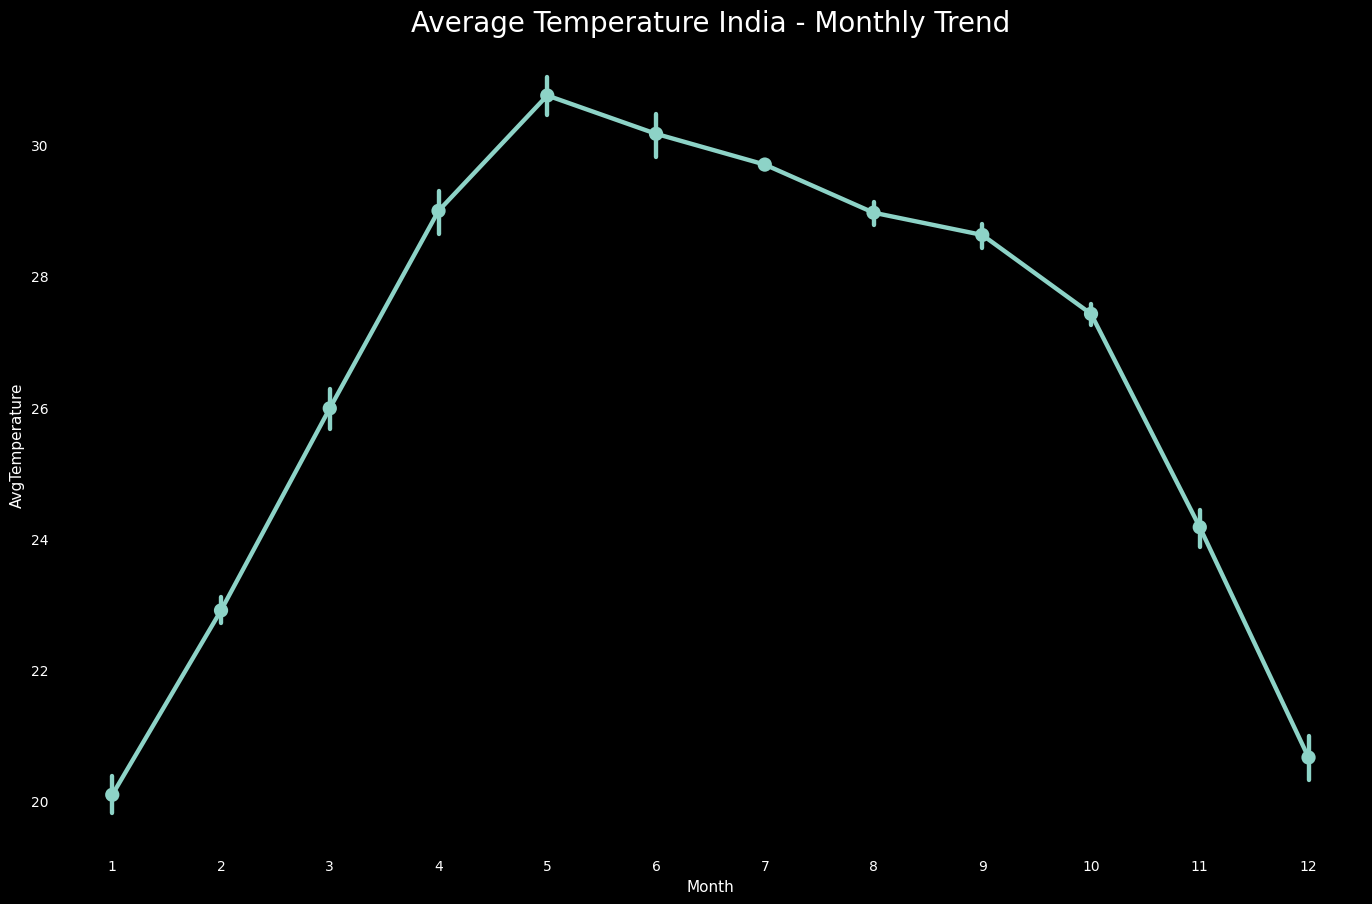

In [111]:
plt.figure(figsize= (15,10))
plt.style.use("dark_background")
plt.grid(False)
sns.pointplot(x='Month', y='AvgTemperature', data=data_india);
plt.title('Average Temperature India - Monthly Trend',fontsize=20);
plt.savefig("avg_tmp_india_monthly.png", format="png")

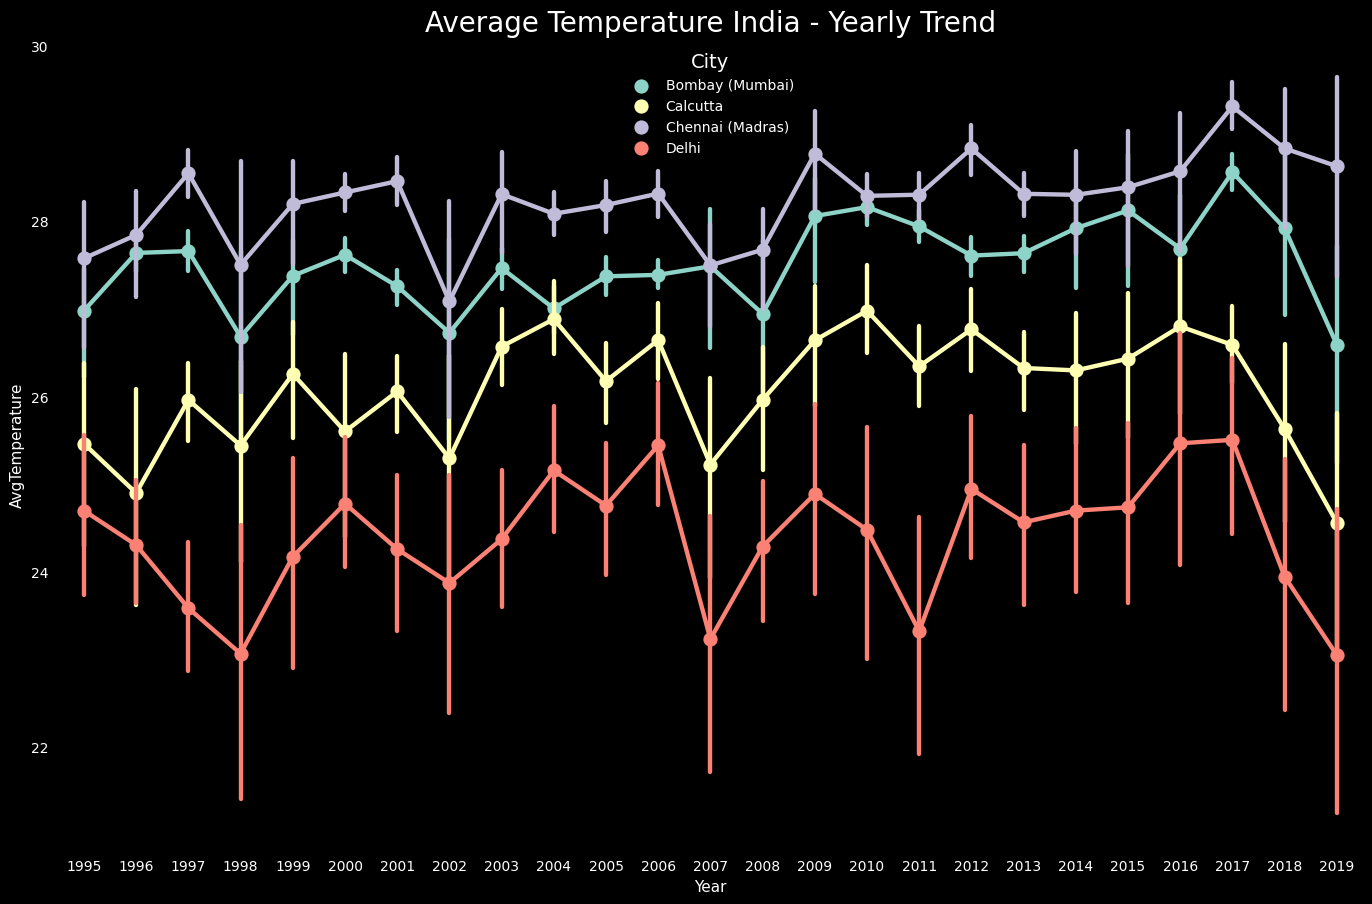

In [112]:
plt.figure(figsize= (15,10))
plt.style.use("dark_background")
plt.grid(False)
sns.pointplot(x='Year', y='AvgTemperature', data=data_india,hue='City');
plt.title('Average Temperature India - Yearly Trend',fontsize=20);
plt.savefig("avg_tmp_india_yearly_cities.png", format="png")

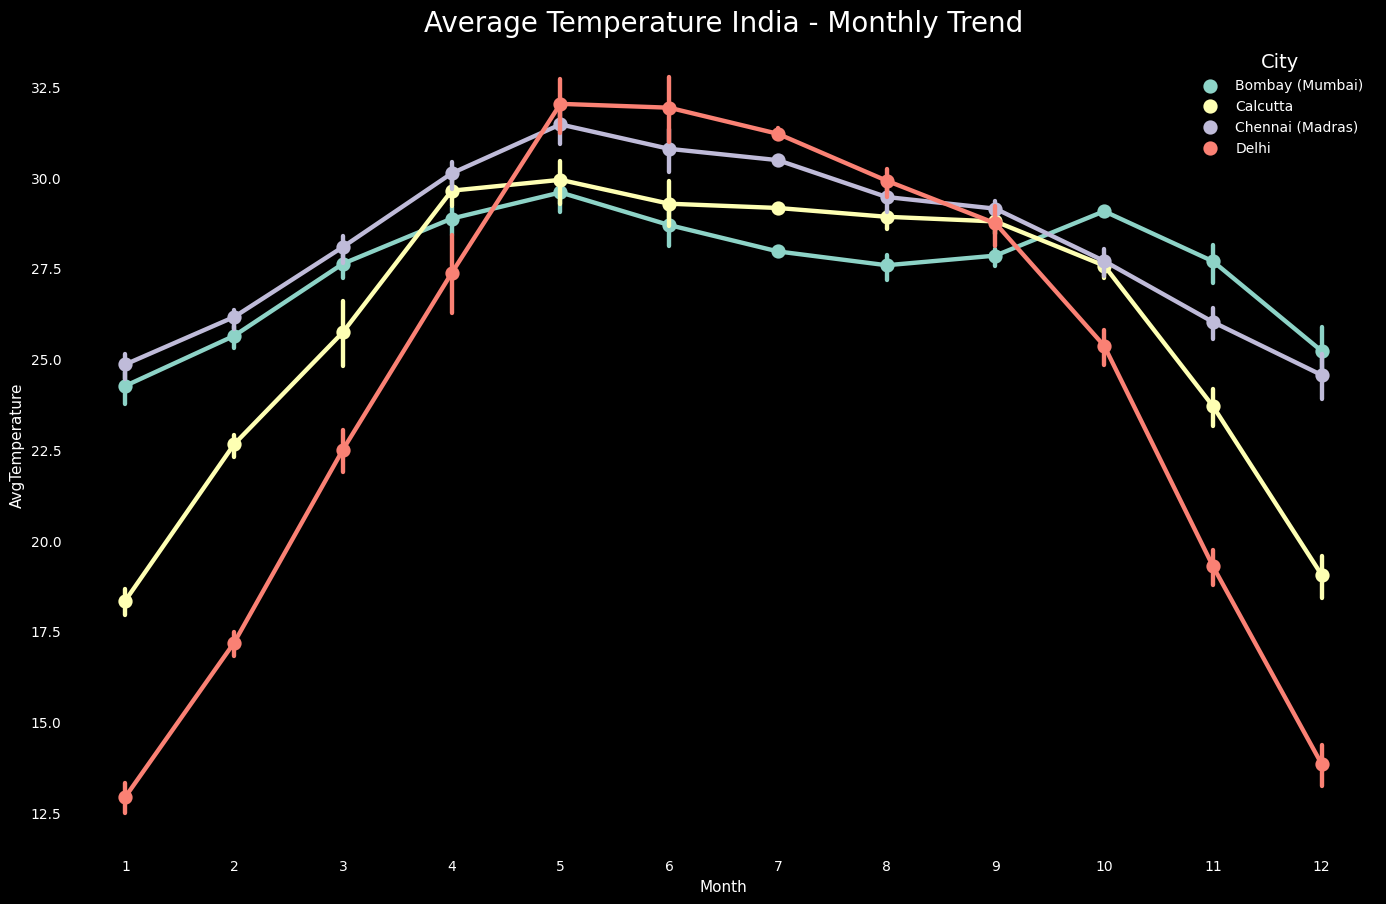

In [113]:
plt.figure(figsize= (15,10))
plt.style.use("dark_background")
plt.grid(False)
sns.pointplot(x='Month', y='AvgTemperature', data=data_india,hue='City');
plt.title('Average Temperature India - Monthly Trend',fontsize=20);
plt.savefig("average_temp_month_cities.png", format='png')